In [3]:
import sigpy.plot as pl
import numpy as np
import torch
import torch.backends.cudnn as cudnn
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
import scipy.io
from torch.autograd import Variable
import UFNet
% matplotlib notebook

In [4]:
mrf_dict = scipy.io.loadmat('/mikRAID/jtamir/projects/MRF_direct_contrast_synthesis/data/DictionaryAndSequenceInfo/fp_dictionary.mat')
# print(MRF_dic.keys())
fp_dict = mrf_dict['fp_dict']
t1_list = mrf_dict['t1_list']
t2_list = mrf_dict['t2_list']
N_dict = t1_list.shape[0]

In [5]:
def read_flipangles(flip_file):
    f = open(flip_file)
    flips =  [float(a) for a in f.readlines()]
    f.close()
    return np.array(flips)
flips = read_flipangles('/mikRAID/jtamir/projects/MRF_direct_contrast_synthesis/data/DictionaryAndSequenceInfo/flipangles.txt')
N_flip = len(flips)

In [6]:
fp_dic = np.hstack(list(fp_dict[0][0])).reshape((N_flip, 2, N_dict)).transpose((0, 2, 1))
fp_dic = np.abs(fp_dic[:,:,0] + 1j * fp_dic[:,:,1])
print(fp_dic.shape)

(500, 22031)


In [7]:
fp_train = fp_dic.transpose(1,0)[:,None,:]

In [8]:
MRF_data = np.load("/home/kewang/Pytorch-UNet/data/augmented_data/MRF/MRF_norm_volunteer9_4.npy")
T1_mapping = np.load("/home/kewang/Pytorch-UNet/Fingerprinting/DictionaryAndSequenceInfo/T1_mapping.npy")
T2_mapping = np.load("/home/kewang/Pytorch-UNet/Fingerprinting/DictionaryAndSequenceInfo/T2_mapping.npy")

In [9]:
Bank = np.load("Bank.npy")
fp_train_cuda = torch.tensor(fp_train).cuda()
B_tensor_cuda = torch.tensor(Bank).cuda()
tau = 0.07
cc = nn.CrossEntropyLoss()

<IPython.core.display.Javascript object>


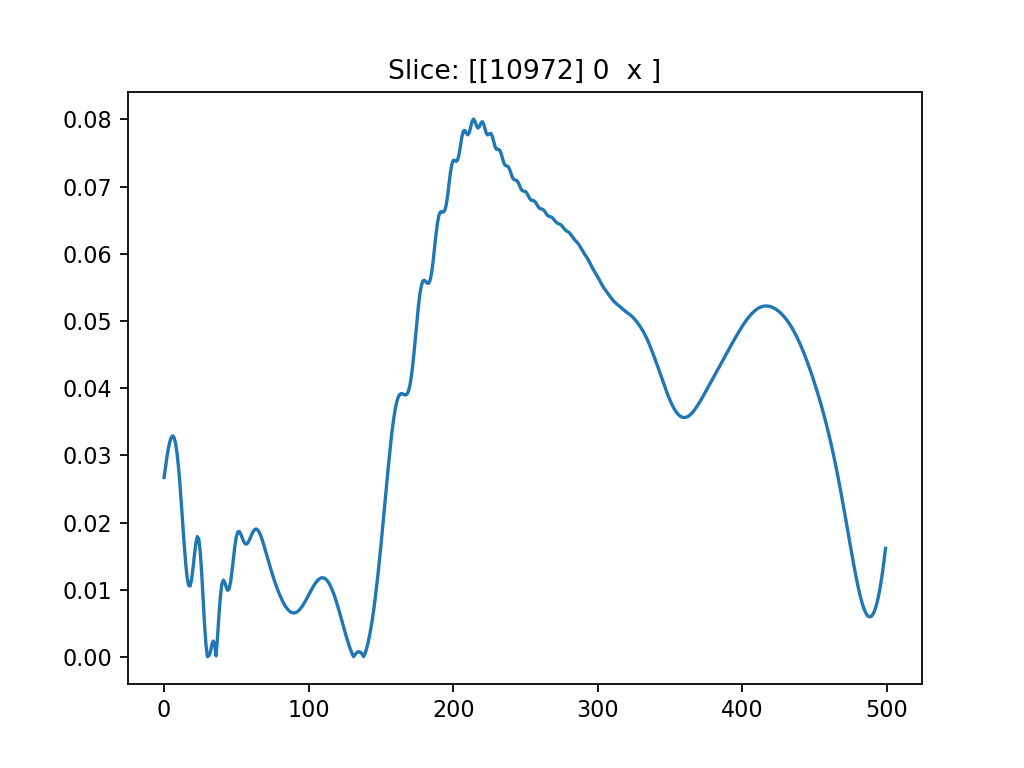

In [29]:
pl.LinePlot(fp_train)

In [17]:
T1A = 870
T1B = 255

In [20]:
k1  = (1-np.exp(-1000/T1A))/2

In [26]:
k2  = (1-np.exp(-1000/T1B))/2

In [27]:
k2

0.4900950020719208

In [28]:
q0/k2

0.052257865321865396

In [23]:
q0 = k1 ** (870/255)

In [11]:
nt = UFNet.PixelNet(1)
# nt.load_state_dict(torch.load("../checkpoints_unf_3/CP19.pth"))
nt0 = nt.cuda()

In [171]:
nt0

PixelNet(
  (conv1): Conv1d(1, 16, kernel_size=(3,), stride=(1,))
  (pool): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (relu): ReLU()
  (conv2): Conv1d(16, 32, kernel_size=(3,), stride=(1,))
  (conv3): Conv1d(32, 64, kernel_size=(3,), stride=(1,))
  (fc1): Linear(in_features=3840, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
)

In [172]:
nt0

PixelNet(
  (conv1): Conv1d(1, 16, kernel_size=(3,), stride=(1,))
  (pool): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (relu): ReLU()
  (conv2): Conv1d(16, 32, kernel_size=(3,), stride=(1,))
  (conv3): Conv1d(32, 64, kernel_size=(3,), stride=(1,))
  (fc1): Linear(in_features=3840, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
)

In [ ]:
input_dic_test = fp_train_cuda[20000,:,:].unsqueeze(0)
input_dic_test2 = fp_train_cuda[0,:,:].unsqueeze(0)

output_dic_test = nt0(input_dic_test)
output_dic_test2 = nt0(input_dic_test2*1.5)
a = output_dic_test.detach().cpu().numpy()-output_dic_test2.detach().cpu().numpy()
pl.LinePlot(output_dic_test.detach().cpu().numpy()-output_dic_test2.detach().cpu().numpy())
# output_dic1_test = torch.mm(output_dic_test,B_tensor_cuda.detach().float().transpose(0,1))/tau
# loss = cc(output_dic1_test,torch.LongTensor([150]).cuda())
# pl.LinePlot(B_tensor_cuda[4000:5000:100,:].detach().cpu().float().numpy())

<IPython.core.display.Javascript object>


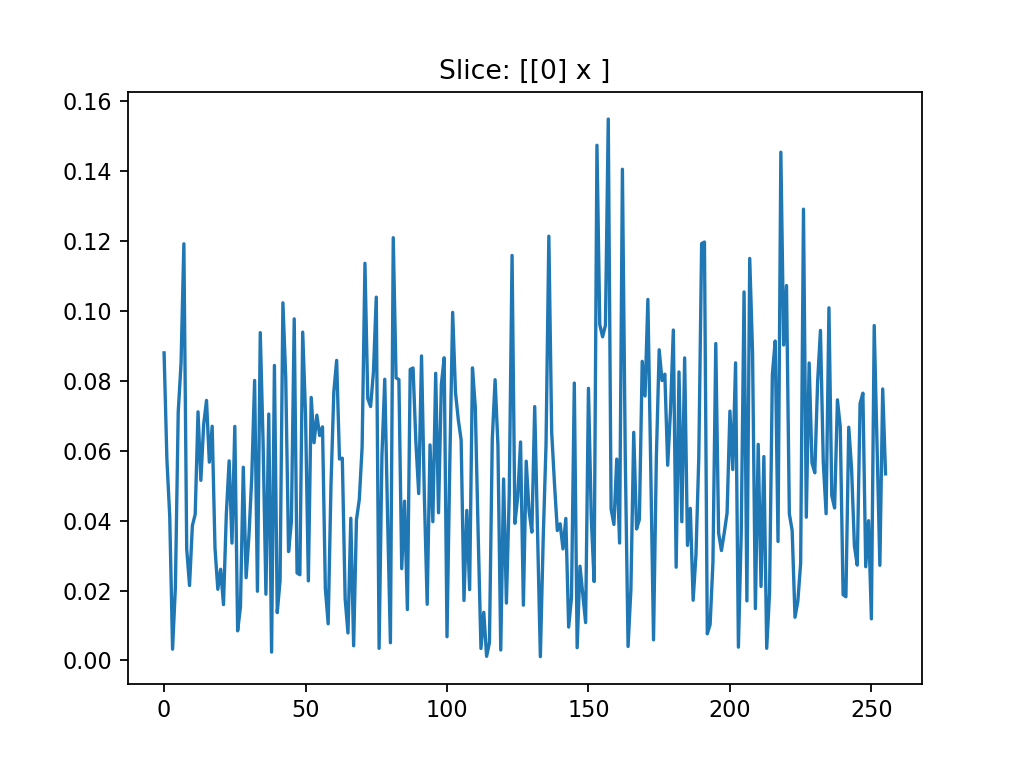

In [15]:
input_dic_test = fp_train_cuda[20000,:,:].unsqueeze(0)
input_dic_test2 = fp_train_cuda[0,:,:].unsqueeze(0)

output_dic_test = nt0(input_dic_test)
output_dic_test2 = nt0(input_dic_test2*1.5)
a = output_dic_test.detach().cpu().numpy()-output_dic_test2.detach().cpu().numpy()
pl.LinePlot(output_dic_test.detach().cpu().numpy())
# output_dic1_test = torch.mm(output_dic_test,B_tensor_cuda.detach().float().transpose(0,1))/tau
# loss = cc(output_dic1_test,torch.LongTensor([150]).cuda())
# pl.LinePlot(B_tensor_cuda[4000:5000:100,:].detach().cpu().float().numpy())

In [99]:
output_dic1_test.shape

torch.Size([1, 22031])

In [100]:
output_dic1_test.max()

tensor(14.2845, device='cuda:0', grad_fn=<MaxBackward1>)